In [1]:

import statistics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import activations
from keras.layers import GlobalAveragePooling2D, BatchNormalization

In [2]:
(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
X_train=X_train/255
X_test=X_test/255

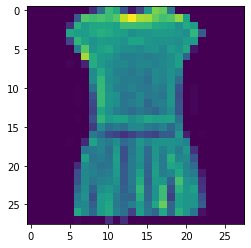

In [4]:
plt.imshow(X_train[3])

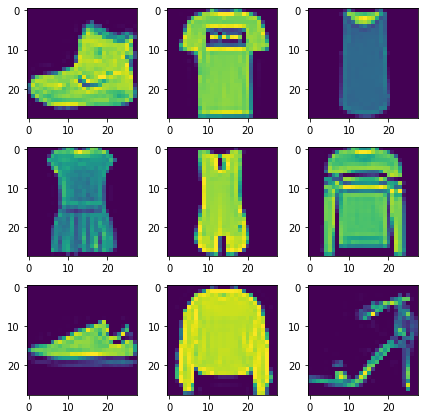

In [5]:
a, b = plt.subplots(3,3) 
a.set_size_inches(6, 6)
k = 0
for i in range(3):
    for j in range(3):
        b[i,j].imshow(X_train[k].reshape(28, 28))
        k += 1
    plt.tight_layout()

In [6]:
X_train=np.array(X_train).reshape(-1,28,28,1)
X_test=np.array(X_test).reshape(-1,28,28,1)
print(X_train.shape)

(60000, 28, 28, 1)


In [7]:
## define the list of types of activation function
activ_func= ['tanh','relu','sigmoid','gelu','swish']


In [8]:
## define the list of the filter
filter=[4]
for i in range(8,130,8):
    filter.append(i)
print((filter))

[4, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 128]


In [9]:
## define the list of kernal size
kernal_size=[1,2,3,4,5,6,7]

In [10]:
## define function for the genome code 
def genome(activ_func_FL_layer,activ_func_NC_layer,activ_func_RC_layer,kernal_size_NC_layer,kernal_size_RC_layer,NC_filter,RC_filter):
    gen = "NC "+str(NC_filter)+" "+str(kernal_size_NC_layer)+" "+str(activ_func_NC_layer)+";"+"RC "+str(RC_filter)+" "+str(kernal_size_RC_layer)+" "+str(activ_func_RC_layer)+";"+"NC "+str(NC_filter)+" "+str(kernal_size_NC_layer)+" "+str(activ_func_NC_layer)+";"+"RC "+str(RC_filter)+" "+str(kernal_size_RC_layer)+" "+str(activ_func_RC_layer)+";"+"FL "+str(activ_func_FL_layer)+";"
    return gen

In [11]:
## function to fit the model
def Dfit(model):
    model.summary()
    model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
    history=model.fit(X_train,Y_train,epochs=10,validation_split=0.2)
    return model.evaluate(X_train,Y_train)[1]*100 , model.evaluate(X_test,Y_test)[1]*100

In [12]:
## function to calculate the parameters
def paramt(model):
    tparam=np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
    ntparam=np.sum([np.prod(v.get_shape()) for v in model.non_trainable_weights])
    return tparam+ntparam

In [13]:
## function to print the data
def printData(gen,param,train_acc,test_acc):
    print("#############################################################################################")
#    print("the model is                      :",  )
    print("the genome code is                :",  gen)
    print("the total number of parameters are:", param)
    print("the training accuracy is          :",train_acc)
    print("the testing accuracy is           :",test_acc)
    print("#############################################################################################")

In [14]:
## create function to train the model
content=[]
import random
def train_model():
    
    activ_func_NC_layer= random.choice(activ_func)
    activ_func_RC_layer=random.choice(activ_func)
    activ_func_FL_layer=random.choice(activ_func)
    
    kernal_size_NC_layer =random.choice(kernal_size)
    kernal_size_RC_layer =random.choice(kernal_size)
    
    NC_filter=random.choice(filter)
    RC_filter=random.choice(filter)
    
    model=tf.keras.Sequential()
    model.add(Conv2D(NC_filter , (kernal_size_NC_layer,kernal_size_NC_layer) , strides = (1,1) , padding = 'same' , activation = activ_func_NC_layer , input_shape = X_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Conv2D(RC_filter , (kernal_size_RC_layer,kernal_size_RC_layer) , strides = (2,2) , padding = 'valid' , activation = activ_func_RC_layer ))
    model.add(BatchNormalization())
    model.add(Conv2D(NC_filter , (kernal_size_NC_layer,kernal_size_NC_layer) , strides = (1,1) , padding = 'same' , activation = activ_func_NC_layer ))
    model.add(BatchNormalization())
    model.add(Conv2D(RC_filter , (kernal_size_RC_layer,kernal_size_RC_layer) , strides = (2,2) , padding = 'valid' , activation = activ_func_RC_layer ))
    model.add(BatchNormalization())
    
    model.add(GlobalAveragePooling2D())
    model.add(layers.Dense(64, activation=activ_func_FL_layer))
    model.add(layers.Dense(10, activation=activations.softmax))
    model.summary()
    
    ##fit the data
    train_acc,test_acc=Dfit(model)
    ## finding genome string
    gen=genome(activ_func_FL_layer,activ_func_NC_layer,activ_func_RC_layer,kernal_size_NC_layer,kernal_size_RC_layer,NC_filter,RC_filter)
    ##find total parameters
    param=paramt(model)
    ## print 
    printData(gen,param,train_acc,test_acc)
    
    ##store the data in csv file
    cont={
        "genome string":gen,
        "parameters":param,
        "training accuracy":train_acc,
        "testing accuracy":test_acc
    }
    content.append(cont)
    

In [15]:
## loop for different combinations
## for just the showing purpose i'm taking 1 value inside the for loop but it denotes that how many models you want to make.
## ihave made 120 models and stored in the csv file
for i in range(1):
    try:
        train_model()
    except:
        pass

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 24)        888       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 24)       96        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       12416     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 128)      512       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 24)        110616    
                                                                 
 batch_normalization_2 (Batc  (None, 14, 14, 24)       9

In [18]:
import pandas as pd
dfff=pd.DataFrame(content)
dfff.to_csv("models_data.csv")

In [19]:
content

[{'genome string': 'NC 24 6 gelu;RC 128 2 sigmoid;NC 24 6 gelu;RC 128 2 sigmoid;FL tanh;',
  'parameters': 146458,
  'training accuracy': 91.51833057403564,
  'testing accuracy': 88.95999789237976}]

In [20]:
dfff

,genome string,parameters,training accuracy,testing accuracy
0,NC 24 6 gelu;RC 128 2 sigmoid;NC 24 6 gelu;RC ...,146458,91.518331,88.959998


TILL NOW WE HAVE CREATED THE CNN MODEL AND TRAINED DIFFERENT MODELS AND SAVED THEM INTO CSV FILES.

In [67]:
df=pd.read_csv('C:/Users/NIKHIL/Desktop/AI.csv')
df

,Unnamed: 0,genome string,parameters,training accuracy,testing accuracy
0,0,NC 80 1 tanh;RC 88 1 tanh;NC 80 1 tanh;RC 88 1...,29226,20.130000,20.400000
1,1,NC 80 4 relu;RC 96 2 swish;NC 80 4 relu;RC 96 ...,194218,95.038331,90.230000
2,2,NC 56 1 gelu;RC 80 7 relu;NC 56 1 gelu;RC 80 7...,450770,93.796664,88.889998
3,3,NC 56 2 relu;RC 32 5 tanh;NC 56 2 relu;RC 32 5...,100634,92.764997,89.980000
4,4,NC 8 2 gelu;RC 80 4 sigmoid;NC 8 2 gelu;RC 80 ...,29786,90.688336,88.669997
...,...,...,...,...,...
105,106,NC 120 7 gelu;RC 56 7 swish;NC 120 7 gelu;RC 5...,999778,96.679997,91.100001
106,107,NC 16 4 relu;RC 72 4 tanh;NC 16 4 relu;RC 72 4...,61754,92.076665,89.190000
107,108,NC 120 4 swish;RC 96 2 gelu;NC 120 4 swish;RC ...,287418,95.434999,90.730000
108,109,NC 24 4 tanh;RC 8 1 relu;NC 24 4 tanh;RC 8 1 r...,5386,86.456668,84.829998


In [68]:
data = df.sort_values(by=['parameters'])
data

,Unnamed: 0,genome string,parameters,training accuracy,testing accuracy
56,56,NC 4 1 sigmoid;RC 32 1 relu;NC 4 1 sigmoid;RC ...,3510,18.455000,18.490000
81,81,NC 16 3 tanh;RC 8 2 relu;NC 16 3 tanh;RC 8 2 r...,3786,85.430002,84.399998
91,92,NC 4 6 swish;RC 8 6 tanh;NC 4 6 swish;RC 8 6 t...,4946,88.800001,86.809999
95,96,NC 112 2 gelu;RC 4 1 gelu;NC 112 2 gelu;RC 4 1...,5266,74.661666,74.010003
108,109,NC 24 4 tanh;RC 8 1 relu;NC 24 4 tanh;RC 8 1 r...,5386,86.456668,84.829998
...,...,...,...,...,...
24,24,NC 72 2 swish;RC 120 7 swish;NC 72 2 swish;RC ...,891882,97.378331,91.229999
105,106,NC 120 7 gelu;RC 56 7 swish;NC 120 7 gelu;RC 5...,999778,96.679997,91.100001
27,27,NC 128 3 relu;RC 96 6 relu;NC 128 3 relu;RC 96...,1005578,97.018331,91.210002
44,44,NC 112 6 swish;RC 104 6 tanh;NC 112 6 swish;RC...,1271546,90.321666,88.010001


In [69]:
data_test_acc=data.iloc[:,4]
data_para=data.iloc[:,2]

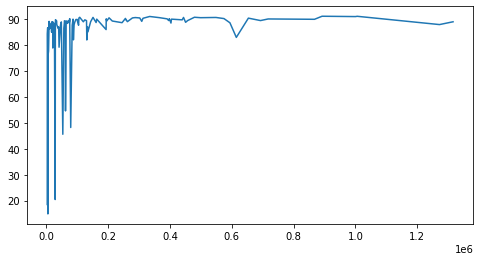

In [70]:
## see plot between parameters versus testing accuracy
plt.plot(data_para,data_test_acc)
plt.rcParams["figure.figsize"] = (8,4)

In [71]:
X = data.iloc[:,2]
Y = data.iloc[:,4]
d_gen=data.iloc[:,1]

In [72]:
X = X.values
Y = Y.values

In [73]:
mean_X = statistics.mean(X)
mean_X

221387

In [74]:
X_l = []
for i in X:
  if i>244924:
    break
  X_l.append(i)

In [75]:
X_l_mean  = statistics.mean(X_l)
X_l_mean

69557

In [76]:
X0 = random.choice(X_l)
pos = np.where(X==X0)
intial_val = Y[pos]
print(pos[0][0],intial_val)

20 [86.08000278]


In [77]:
def starting_point():
  X0 = random.choice(X_l)
  pos = np.where(X==X0)
  intial_val = Y[pos]
  return pos[0][0],intial_val

In [78]:
def difference_ratio(current_param,current_acc,best_parm,best_acc):
  temp1 = current_param-best_parm
  temp2 = current_acc-best_acc
  ratio = temp1/temp2
  return ratio

In [88]:
pos,intial_val = starting_point()
count = 0
while(1):
  X0_left_1 = pos -1
  X0_right_1 = pos + 1
  X0_left_2 = pos -2
  X0_right_2 = pos + 2

  if(Y[X0_left_1]>intial_val):
    final_seq = X0_left_1
    #print("Taking Left 1",X[X0_left_1],Y[X0_left_1])
    pos = X0_left_1
  
  elif(Y[X0_right_1]>intial_val):
    current_param = X[X0_right_1]
    current_acc = Y[X0_right_1]
    best_parm = X[pos]
    best_acc = Y[pos]
    ratio = difference_ratio(current_param,current_acc,best_parm,best_acc)
    if ratio <100000:
      final_seq = X0_right_1
      #print("Taking Right 1",X[X0_right_1],Y[X0_right_1])
    pos = X0_right_1
    
  
  elif(Y[X0_left_2]>intial_val):
    final_seq = X0_left_2
    #print("Taking Left 2",X[X0_left_2],Y[X0_left_2])
    pos = X0_left_2
  
  elif(Y[X0_right_2]>intial_val):
    current_param = X[X0_right_1]
    current_acc = Y[X0_right_1]
    best_parm = X[pos]
    best_acc = Y[pos]
    ratio = difference_ratio(current_param,current_acc,best_parm,best_acc)
    if ratio <150000:
      final_seq = X0_right_2
      #print("Taking Right 2",X[X0_right_2],Y[X0_right_2])
    pos = X0_right_2

  if(count==50):
    if Y[pos]>75.0:
      final_seq = pos
      #print("Taking ",pos,Y[pos])
      break
    else:
      count=0
  
  count+=1
  pos,intial_val = starting_point()
  #print("Best not found",pos,intial_val,count)
  


In [89]:
pos

13

In [92]:
print("The testing accuracy of the best model is:",Y[pos])

The testing accuracy of the best model is: 88.55000138


In [93]:
print("The respective parameters are :",X[pos])

The respective parameters are : 16598


In [94]:
gen=data.iloc[pos,1]
data.iloc[pos]

Unnamed: 0                                                          42
genome string        NC 4 5 sigmoid;RC 64 3 relu;NC 4 5 sigmoid;RC ...
parameters                                                       16598
training accuracy                                            90.576667
testing accuracy                                             88.550001
Name: 42, dtype: object

In [95]:
gen

'NC 4 5 sigmoid;RC 64 3 relu;NC 4 5 sigmoid;RC 64 3 relu;FL gelu;'

In [96]:
NC_layer1,RC_layer1,NC_layer2,RC_layer2,FL_layer,sdd=gen.split(';')
type(NC_layer1)
sddd,NC_filter,kernal_size_NC_layer,activ_func_NC_layer=NC_layer1.split(' ')
print(type(int(NC_filter)))

<class 'int'>


TILL NOW WE HAVE APPLIED HILL CLIMBING AND FOUND THE BEST MODEL FOR US.

In [108]:
## function to break the genome
def break_genome(gen):
    NC_layer1,RC_layer1,NC_layer2,RC_layer2,FL_layer,sdd=gen.split(';')
    
    #break NC_layer
    sddd,NC_filter,kernal_size_NC_layer,activ_func_NC_layer=NC_layer1.split(' ')
    NC_filter=int(NC_filter)
    kernal_size_NC_layer=int(kernal_size_NC_layer)
    
    #break RC layer
    sdddd,RC_filter,kernal_size_RC_layer,activ_func_RC_layer=RC_layer1.split(' ')
    RC_filter=int(RC_filter)
    kernal_size_RC_layer=int(kernal_size_RC_layer)
    
    #break full layer
    sd,activ_func_FL_layer=FL_layer.split(' ')
    
    best_model(NC_filter,RC_filter,kernal_size_NC_layer,kernal_size_RC_layer,activ_func_NC_layer,activ_func_RC_layer,activ_func_FL_layer)

In [109]:
## function to train the best model we get after searching
def best_model(NC_filter,RC_filter,kernal_size_NC_layer,kernal_size_RC_layer,activ_func_NC_layer,activ_func_RC_layer,activ_func_FL_layer):
    model=tf.keras.Sequential()
    model.add(Conv2D(NC_filter , (kernal_size_NC_layer,kernal_size_NC_layer) , strides = (1,1) , padding = 'same' , activation = activ_func_NC_layer , input_shape = X_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Conv2D(RC_filter , (kernal_size_RC_layer,kernal_size_RC_layer) , strides = (2,2) , padding = 'valid' , activation = activ_func_RC_layer ))
    model.add(BatchNormalization())
    model.add(Conv2D(NC_filter , (kernal_size_NC_layer,kernal_size_NC_layer) , strides = (1,1) , padding = 'same' , activation = activ_func_NC_layer ))
    model.add(BatchNormalization())
    model.add(Conv2D(RC_filter , (kernal_size_RC_layer,kernal_size_RC_layer) , strides = (2,2) , padding = 'valid' , activation = activ_func_RC_layer ))
    model.add(BatchNormalization())
    
    model.add(GlobalAveragePooling2D())
    model.add(layers.Dense(64, activation=activ_func_FL_layer))
    model.add(layers.Dense(10, activation=activations.softmax))
    model.summary()
    
    model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
    history=model.fit(X_train,Y_train,epochs=10,validation_split=0.2)
    
    ## plot the accuracy and loss of both the training data and validation data
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.subplot(1, 2, 1)
    plt.plot(range(10), acc, label='Training Accuracy')
    plt.plot(range(10), val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(10), loss, label='Training Loss')
    plt.plot(range(10), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Loss')
    plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 4)         104       
                                                                 
 batch_normalization_16 (Bat  (None, 28, 28, 4)        16        
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 64)        2368      
                                                                 
 batch_normalization_17 (Bat  (None, 13, 13, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_18 (Conv2D)          (None, 13, 13, 4)         6404      
                                                                 
 batch_normalization_18 (Bat  (None, 13, 13, 4)       

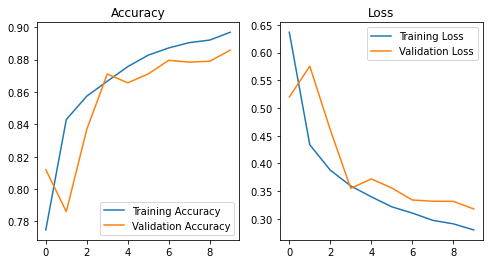

In [110]:
break_genome(gen)
